<p align="center">
<img src="https://www.uao.edu.co/wp-content/uploads/2024/12/uao-logo-2-04.webp" width=15%>


<h2>UNIVERSIDAD AUTÓNOMA DE OCCIDENTE</strong></h2>
<h3>02/27/2025 CALI - COLOMBIA</strong></h3>
<h3><strong>MAESTRIA EN INTELIGENCIA ARTIFICIAL Y CIENCIA DE DATOS</strong></h3>
<h3><strong>ETL (EXTRACT, TRANSFORM AND LOAD)</strong></h3>
<h3><strong>ENTREGA 1.0. </strong> TRABAJO FINAL - Ejercicio de Extracción, Transformacion y Carga (ETL) de datos usando Healthcare Dataset - EDA desde kaggle</h3>
<h3><strong>Profesor:</strong> JAVIER ALEJANDRO VERGARA ZORRILLA</h3>
<h3><strong>Alumno:</strong></h3>

<li><font color='lighblue'> 22500214 Yoniliman Galvis Aguirre </font></li>

#Cargar las librerías

Primer instalar requirements.txt con el orden indicado de las librerias a instalar en el SO

```
pandas
sqlalchemy
psycopg2
pyyaml
jupyter
```

<li><b>pandas y sqlalchemy</b> Estas son bibliotecas fundamentales y por eso se deben instalar primero.</li>
<li><b>psycopg2</b>  es un conector de PostgreSQL para Python y depende de sqlalchemy y debe de instalarse después de sqlalchemy.</li>
<li><b>pyyaml</b>  es una biblioteca para analizar archivos YAML y puede ser utilizada por otras bibliotecas. es mejor instalarla antes de jupyter.</li>
<li><b>jupyter</b>  es el entorno de notebook y debe instalarse al final, después de que todas las dependencias estén instaladas.</li>

In [1]:
#Verificar entorno, debe coincidir con 
!which python
# una opcion es correr el enviroment desde poetry, en la terminal ejecute
# poetry run jupyter notebook
# esto abrirá una version web de jupyter
# en otro caso cambie el kernel y use los venv disponibles

/home/ygalvis/Documents/Study/ETL_project/.venv/bin/python


In [2]:
import yaml #manejo de archivos de configuracion .yaml
import psycopg2 #conector de sql, postgresql, mysql, mariaDB
from psycopg2 import sql #driver para postgresql en python
from sqlalchemy import create_engine, text #librería ORM (Object relational Mapper/Mappingtool) para facilitar trabajos con estructura de la DB y los datos
import pandas as pd #permite el manejo, análisis de datos en python
import numpy as np #computacion científica y matemática

# Funcion de cargar archivo de configuracion de la base de datos
Esto permite que el código no tenga datos sensibles como claves o direccionamiento a servidores

Example to create the config.yaml file:

```
database:
  user: "postgres"
  password: "password"
  host: "localhost"
  port: 5432
  name: "etl_db"
```

In [3]:
def load_config(file_path="ETLprj_config.yaml"):
    with open(file_path, "r") as file:
        return yaml.safe_load(file)

# Carga y despliegue de CSV
En este caso el archivo csv se encuentra en la misma carpeta

In [4]:
# Carga de archivo CSV
csv = pd.read_csv("Dataset/caso etl.csv", header=0,delimiter=',') #espicifico qu etiene encabezados y esta separado por ;

# Mostrar el top(5) del DataFrame
csv.head(10)

/tmp/ipykernel_199466/3173352973.py:2: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  csv = pd.read_csv("Dataset/caso etl.csv", header=0,delimiter=',') #espicifico qu etiene encabezados y esta separado por ;


,DateTime,ID,Prod_ID,Type,Train,Unit,Phase_ID,EU,Value,Verify
0,2/27/2025 7:34:21,BYBAGDDIM,87426,F,C,PMX,MD1M66,kg,1.000000,0
1,2/5/2025 6:57:51,BXWAGDD6N,87426,F,C,PMX,MD1M66,kg,1.003704,0
2,2/5/2025 2:07:48,9NGAGDD6M,87426,F,C,PMX,MD1M66,kg,0.996296,0
3,2/4/2025 23:04:32,XT7AGDD67,87426,F,C,PMX,MD1M66,kg,1.014815,0
4,2/4/2025 17:45:15,V9EAGDD66,87426,F,C,PMX,MD1M66,kg,0.970370,0
5,2/4/2025 15:15:41,GZ7AGDD65,87426,F,C,PMX,MD1M66,kg,0.988889,0
6,2/4/2025 11:36:37,RQVAGDD65,87426,F,C,PMX,MD1M66,kg,1.000000,0
7,2/3/2025 18:31:57,FLBAGDD5M,87426,F,C,PMX,MD1M66,kg,1.003704,0
8,2/3/2025 8:31:47,E0PAGDD5K,87426,F,C,PMX,MD1M66,kg,0.996296,0
9,1/20/2025 18:17:04,AL3AGCCY0,87426,F,C,PMX,MD1M66,kg,1.003704,0


# Cargar parámetros de la DB
Usando el archivo de config.yam, tomamos los parametros de configuracion, los asigna a etiquetas y los carga en variables internas

In [5]:
config = load_config()
db_config = config["database"]

# Load credentials
db_user = db_config["user"]
db_password = db_config["password"]
db_host = db_config["host"]
db_port = db_config["port"]
db_name = db_config["name"]

# Asignando las variables
se crea el objeto de conexion con la base de datos

#Posgresql

para acceder a la base de datos debe ingresar como super user, el ingresará con el usuario del sistema y el password es elmismo del sistema:

<code> $ sudo su - postgres</code>

In [6]:
# DB connection
conn = psycopg2.connect(
    dbname="postgres",
    user=db_user,
    password=db_password,
    host=db_host,
    port=db_port
)
conn.autocommit = True

# Crear Base de Datos para el taller 
Usaos el objeto de conexion y los parámetros dados con anterioridad.

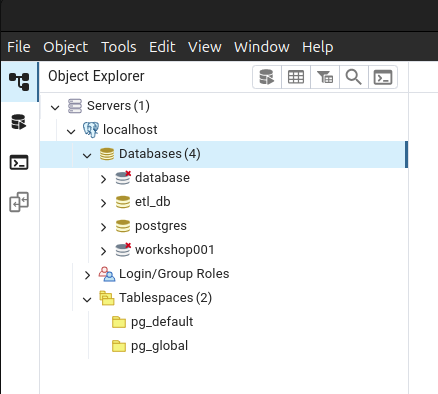

In [22]:
db_name = "ETL_prj"
try:
    with conn.cursor() as cur:
        cur.execute(sql.SQL("CREATE DATABASE {}").format(sql.Identifier(db_name)))
        print(f"Base de datos '{db_name}' creada exitosamente.")
except psycopg2.errors.DuplicateDatabase:
    print(f"La base de datos '{db_name}' ya existe.")
finally:
    conn.close()

Base de datos 'ETL_prj' creada exitosamente.


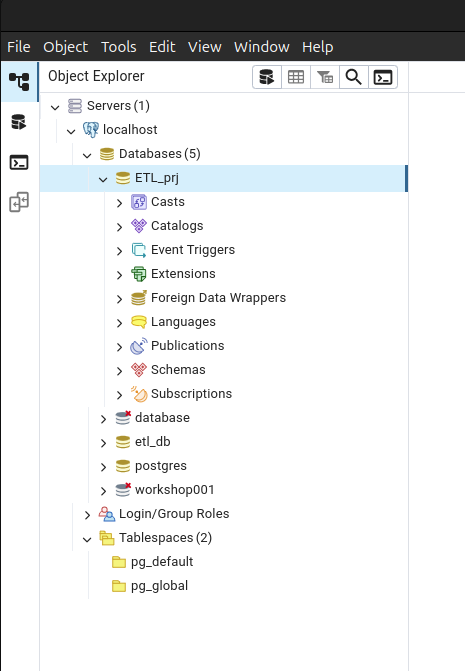

# Crear la tabla en la base de datos
Primero se verifican las columnas y se intenta saber que tipo son

In [24]:
# Mostrar el header del DataFrame
csv.head(1)

,DateTime,ID,Prod_ID,Type,Train,Unit,Phase_ID,EU,Value,Verify
0,2/27/2025 7:34:21,BYBAGDDIM,87426,F,C,PMX,MD1M66,kg,1.0,0


In [7]:
print(csv.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236529 entries, 0 to 236528
Data columns (total 10 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   DateTime  236529 non-null  object 
 1   ID        236529 non-null  object 
 2   Prod_ID   236529 non-null  object 
 3   Type      236529 non-null  object 
 4   Train     236529 non-null  object 
 5   Unit      236529 non-null  object 
 6   Phase_ID  236529 non-null  object 
 7   EU        236529 non-null  object 
 8   Value     236529 non-null  float64
 9   Verify    236529 non-null  int64  
dtypes: float64(1), int64(1), object(8)
memory usage: 18.0+ MB
None


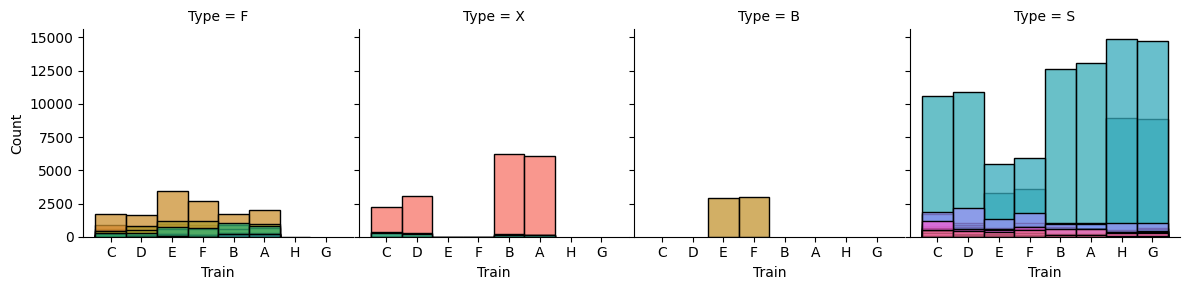

In [17]:
import seaborn as sns
from traitlets.traitlets import Long
import matplotlib.pyplot as plt

# Showing Quantity Product type made by train
g = sns.FacetGrid(csv, col="Type",  hue="Prod_ID", margin_titles=True, height = 3)
g.map(sns.histplot, "Train")
g.figure.subplots_adjust(wspace=.02, hspace=.02)
# Show plot
plt.show()

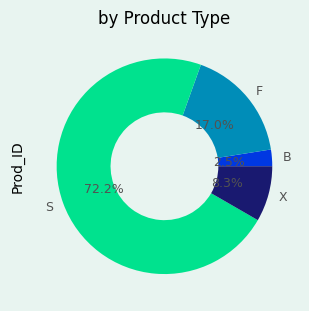

In [27]:
# Explode Shoes slice
my_explode = [0.1, 0.2, 0, 0.3] #explode=my_explode

# color palette
font_color = '#525252'
colors = ['#0038E2', '#008DB8', '#00E28E', '#191970',]

# Create subplots and a pie chart
fig, ax = plt.subplots(figsize=(10, 7), facecolor='#e8f4f0')

# Create pie chart
ax = csv.groupby('Type').count()['Prod_ID'].plot.pie(y=csv['Type'],
                                                       title="by Product Type",
                                                       figsize=(3.5, 3.5),
                                                       fontsize=9,
                                                       wedgeprops=dict(width=.5), # For donuts
                                                       colors=colors,
                                                       textprops={'color':font_color},
                                                       autopct='%1.1f%%',
                                                       shadow=False,

                                                       )


In [30]:
# Get data by Train Column and count of products by train
Grp_Train_Prod = csv.groupby('Train').count()['Prod_ID']

# Get data by type column and count products by type
Grp_Type_Prod = csv.groupby('Type').count()['Prod_ID']

# Get data by train Column and count type products by train
Grp_Train_Type = csv.groupby('Train').count()['Type']

# Get data by product Column and count type phase by product
Grp_Phase_Type = csv.groupby('Prod_ID').count()['Phase_ID']

# Mostrar los resultados
print('Group Products by Train \n {} \n '.format(Grp_Train_Prod.sort_values(ascending=True)))
print('Group Products by Type \n {} \n '.format(Grp_Type_Prod.sort_values(ascending=True)))
print('Group Type by Train \n {} \n '.format(Grp_Train_Type.sort_values(ascending=True)))
print('Group phase by Product \n {} \n '.format(Grp_Phase_Type.sort_values(ascending=True)))

Group Products by Train 
 Train
E    28059
H    28061
G    28550
F    29790
D    29933
C    30188
B    30822
A    31126
Name: Prod_ID, dtype: int64 
 
Group Products by Type 
 Type
B      5888
X     19708
F     40273
S    170660
Name: Prod_ID, dtype: int64 
 
Group Type by Train 
 Train
E    28059
H    28061
G    28550
F    29790
D    29933
C    30188
B    30822
A    31126
Name: Type, dtype: int64 
 
Group phase by Product 
 Prod_ID
1992576         16
199374          16
1992582         17
199257          17
898173          18
             ...  
1991466      10813
8913741      13170
88758648     17618
198771459    42069
198771459    71756
Name: Phase_ID, Length: 61, dtype: int64 
 


# Crear Base de Datos
Se define el motor de la base de datos que es una cadena de texto que contiene los parametros necesarios para la conexion
luego usando este motor se envia un tsql al motor de DB para crear la tabla donde vamos a llevar los datos en el csv, se deben de crear las columnas con nombres iguales al header del dataframe

In [31]:
engine = create_engine(f"postgresql://{db_user}:{db_password}@{db_host}:{db_port}/{db_name}")

with engine.connect() as conn:
    conn.execute(text("""
        CREATE TABLE IF NOT EXISTS Dataset (
            id SERIAL PRIMARY KEY,
            "DateTime" DATE,
            "ID" VARCHAR(250),
            "Prod_ID" VARCHAR(100),
            "Type" VARCHAR(10),
            "Train" VARCHAR(10),
            "Unit" VARCHAR(10),
            "Phase_ID" VARCHAR(100),
            "EU" VARCHAR(10),
            "Value" Float,
            "Verify" smallint
        );
    """))
    conn.commit()  # Asegúrate de confirmar los cambios
    print("Tabla 'Dataset' creada exitosamente en PostgreSQL.")

Tabla 'Dataset' creada exitosamente en PostgreSQL.


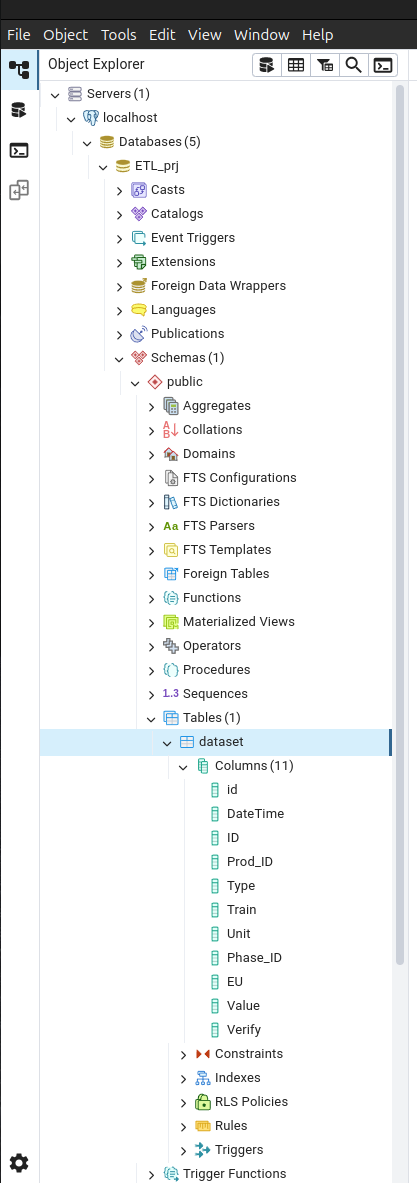

# Inserción de datos
Insertamos los datos del dataframe en la tabla creada y usando los datos del engine, si los datos ya existen los va a adicionar y no va ha tratar de escribir el indice ya que la tabla tiene un indice que incrementa de forma automática al crear registros nuevos

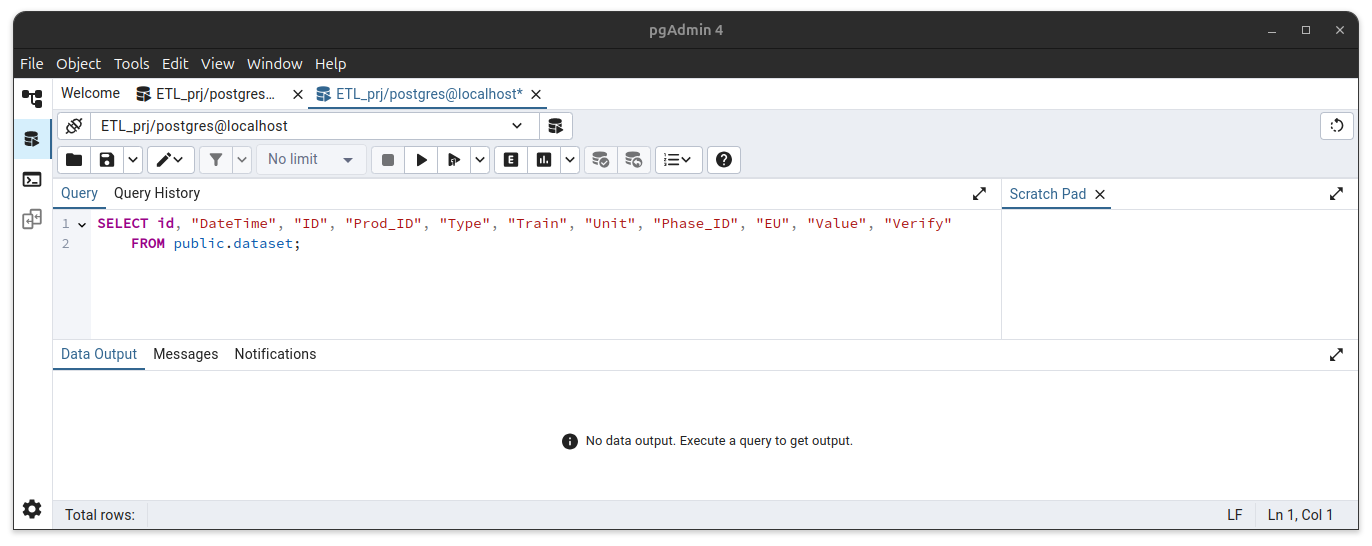

In [34]:
# Insertar datos en la tabla usando DataFrame a la tabla en PostgreSQL

try:
    csv.to_sql('dataset', engine, if_exists='append', index=False)
    print("Datos insertados exitosamente.")
except SQLAlchemyError as e:
    print(f"Error al insertar los datos: {e}")

Datos insertados exitosamente.


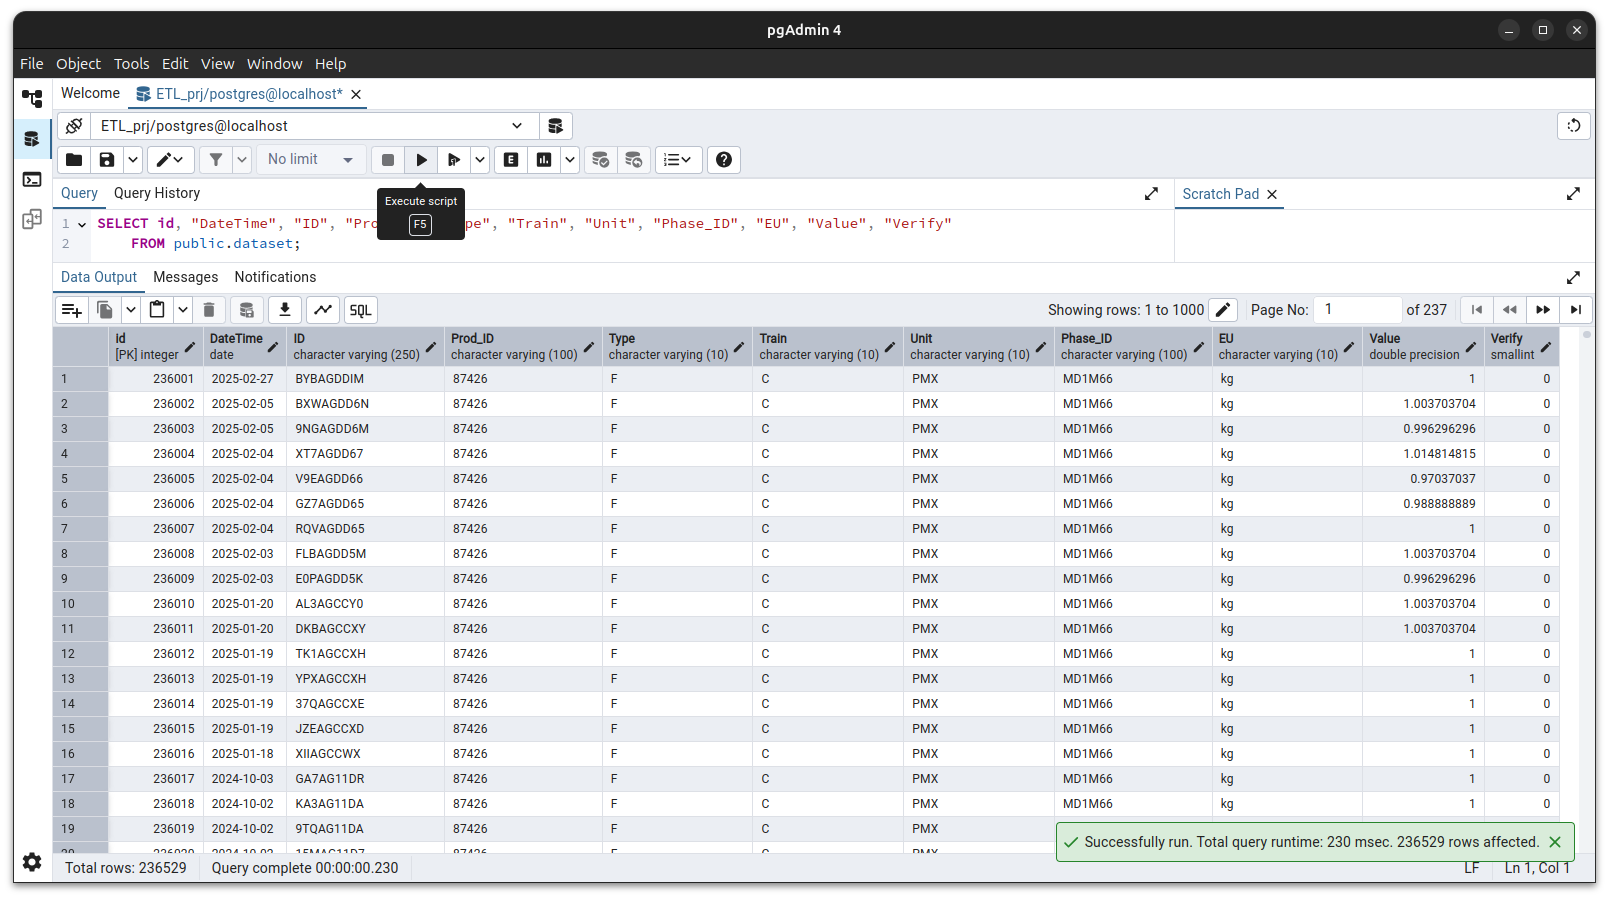

# Leer y Cargar Datos
Leemos los datos y los mostramos

In [36]:
# Leer datos de la tabla
with engine.connect() as conn:
    result = conn.execute(text("SELECT * FROM dataset LIMIT 10;"))
    rows = result.fetchall()

# Mostrar los resultados
print("Datos en 'tabla_etl':")
for row in rows:
    print(row)

Datos en 'tabla_etl':
(236001, datetime.date(2025, 2, 27), 'BYBAGDDIM', '87426', 'F', 'C', 'PMX', 'MD1M66', 'kg', 1.0, 0)
(236002, datetime.date(2025, 2, 5), 'BXWAGDD6N', '87426', 'F', 'C', 'PMX', 'MD1M66', 'kg', 1.003703704, 0)
(236003, datetime.date(2025, 2, 5), '9NGAGDD6M', '87426', 'F', 'C', 'PMX', 'MD1M66', 'kg', 0.996296296, 0)
(236004, datetime.date(2025, 2, 4), 'XT7AGDD67', '87426', 'F', 'C', 'PMX', 'MD1M66', 'kg', 1.014814815, 0)
(236005, datetime.date(2025, 2, 4), 'V9EAGDD66', '87426', 'F', 'C', 'PMX', 'MD1M66', 'kg', 0.97037037, 0)
(236006, datetime.date(2025, 2, 4), 'GZ7AGDD65', '87426', 'F', 'C', 'PMX', 'MD1M66', 'kg', 0.988888889, 0)
(236007, datetime.date(2025, 2, 4), 'RQVAGDD65', '87426', 'F', 'C', 'PMX', 'MD1M66', 'kg', 1.0, 0)
(236008, datetime.date(2025, 2, 3), 'FLBAGDD5M', '87426', 'F', 'C', 'PMX', 'MD1M66', 'kg', 1.003703704, 0)
(236009, datetime.date(2025, 2, 3), 'E0PAGDD5K', '87426', 'F', 'C', 'PMX', 'MD1M66', 'kg', 0.996296296, 0)
(236010, datetime.date(2025, 1,

# Cargamos los datos a un Dataframe haciendo una consulta simple

In [38]:
with engine.connect() as conn:
    df = pd.read_sql("SELECT * FROM dataset", conn)
df.head(10)

,id,DateTime,ID,Prod_ID,Type,Train,Unit,Phase_ID,EU,Value,Verify
0,236001,2025-02-27,BYBAGDDIM,87426,F,C,PMX,MD1M66,kg,1.000000,0
1,236002,2025-02-05,BXWAGDD6N,87426,F,C,PMX,MD1M66,kg,1.003704,0
2,236003,2025-02-05,9NGAGDD6M,87426,F,C,PMX,MD1M66,kg,0.996296,0
3,236004,2025-02-04,XT7AGDD67,87426,F,C,PMX,MD1M66,kg,1.014815,0
4,236005,2025-02-04,V9EAGDD66,87426,F,C,PMX,MD1M66,kg,0.970370,0
5,236006,2025-02-04,GZ7AGDD65,87426,F,C,PMX,MD1M66,kg,0.988889,0
6,236007,2025-02-04,RQVAGDD65,87426,F,C,PMX,MD1M66,kg,1.000000,0
7,236008,2025-02-03,FLBAGDD5M,87426,F,C,PMX,MD1M66,kg,1.003704,0
8,236009,2025-02-03,E0PAGDD5K,87426,F,C,PMX,MD1M66,kg,0.996296,0
9,236010,2025-01-20,AL3AGCCY0,87426,F,C,PMX,MD1M66,kg,1.003704,0
